## Appendix Table A8: Latinx First-Year Enrollments Since 2001 Without Admissions Control

from White Flight in Higher Education? The Case of Hispanic-Serving Institutions

by Laura Hamilton, Charlie Eaton, and Simon Cheng

In [1]:
quietly {

use /Users/Charlie/Dropbox/Stata_Notebooks/racedebtstrat/hdef19802019.dta, clear
keep if control<3 & iclevel==1 & year>1989 & ftfeftotlt>100 & ftfeftotlt<.
    
keep if year>2000.
    gen pubpriv="public"
    replace pubpriv="private" if control==2
    
foreach var in efbkaat efhispt efwhitt efaiant efasiat {
quietly    gen pctt`var'= t`var' / teftotlt * 100
quietly gen lnftf`var'=log(ftf`var')
    quietly gen lnt`var'=log(t`var')
}
foreach var in cpopam cpopas cpopbl cpopwh cpophi populationam populationas populationbl populationhi populationwh {
        gen ln`var'=log(`var')
    }

quietly gen lnftfeftotlt=log(ftfeftotlt)

**More robust would be discontinuity
quietly gen hispserve=0 if pcttefhispt!=.
quietly replace hispserve=1 if pcttefhispt>=25 & pcttefhispt<.

xtset unitid year

**create var for year in which event occurs observation year of event for subject**
by unitid: gen transition=year if hispserv==1 & l.hispserv==0

**create var for year in which event occurs in all observations for all years for subject**
by unitid: egen hispserveyear = min(transition)

**generate a var for the number of years relative to the year of the event (e.g. + or - 2 years)

gen hispserveyeardiff= year-hispserveyear
    
**bin up year differences larger than absolute value of 10**
replace hispserveyeardiff =10 if hispserveyeardiff <9999 & hispserveyeardiff >10
replace hispserveyeardiff =-10 if hispserveyeardiff <-10
    
    gen afteryrs=0
replace afteryrs=hispserveyeardiff if hispserveyeardiff>0 & hispserveyeardiff<.
gen beforeyrs=0
replace beforeyrs=hispserveyeardiff if hispserveyeardiff<0
gen beforeafteryrs=0
replace beforeafteryrs=hispserveyeardiff if hispserveyeardiff!=.
    
    replace hispserveyeardiff=hispserveyeardiff+10
    
gen switchers = (hispserveyeardiff<.)
    label var beforeyrs "before years"
    label var afteryrs "after years"
    label var beforeafteryrs "before and after years"
    label var lnftfefwhitt "white"
    label var lnftfefasiat "Asian"
    label var lnftfefbkaat "Black"
    label var admitpct "% admitted"
}
sum beforeyrs afteryrs beforeafteryrs



. sum beforeyrs afteryrs beforeafteryrs

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
   beforeyrs |     29,233   -.3164916    1.563207        -10          0
    afteryrs |     29,233    .1045736    .8157278          0         10
beforeafte~s |     29,233    -.211918    1.781916        -10         10


In [5]:
*** Check and clear xt

    qui xtset
    qui set line 105
    qui set more off

foreach pubpriv in public private {

est clear
        qui eststo SwPost: reghdfe lnftfefhispt beforeyrs afteryrs lnftfeftotlt ///
        lnpop* lncpop* i.year if switchers==1 & pubpriv=="`pubpriv'", absorb(unitid) cluster(unitid)

        qui eststo counterPost: reghdfe lnftfefhispt beforeyrs afteryrs lnftfeftotlt ///
        lnpop* lncpop* i.year if pcttefhispt>=15 & pubpriv=="`pubpriv'", absorb(unitid) cluster(unitid)
        
        qui eststo NSwPost: reghdfe lnftfefhispt beforeyrs afteryrs lnftfeftotlt ///
        lnpop* lncpop* i.year if pubpriv=="`pubpriv'", absorb(unitid) cluster(unitid)
        
        qui eststo Swdiff: reghdfe lnftfefhispt afteryrs beforeafteryrs lnftfeftotlt ///
        lnpop* lncpop* i.year if switchers==1 & pubpriv=="`pubpriv'", absorb(unitid) cluster(unitid)

        qui eststo counterdiff: reghdfe lnftfefhispt afteryrs beforeafteryrs lnftfeftotlt ///
        lnpop* lncpop* i.year if pcttefhispt>15 & pubpriv=="`pubpriv'", absorb(unitid) cluster(unitid)
        
        qui eststo NSwdiff: reghdfe lnftfefhispt afteryrs beforeafteryrs lnftfeftotlt ///
        lnpop* lncpop* i.year if pubpriv=="`pubpriv'", absorb(unitid) cluster(unitid)
        
        esttab SwPost counterPost NSwPost Swdiff counterdiff NSwdiff, star(* .05 ** .01 *** .001) ///
        stats(r2_a_within N_clust N, fmt(2 %9.0fc %9.0fc) label("r2" "schools" "N")) ///
        keep(beforeyrs afteryrs beforeafteryrs admitpct) se(%9.3fc) b(%9.3fc) ///        
        order(beforeyrs afteryrs beforeafteryrs admitpct) ///
        label mtitle("Switchers" "Counterfac" "All" "Switchers" "Counterfac ""All") ///
        prehead("`pubpriv' Latinx enrollment") nonotes modelwidth(10)
            
   qui esttab SwPost counterPost NSwPost Swdiff counterdiff NSwdiff using tables/ta7_latinx`pubpriv'admit.rtf, star(* .05 ** .01 *** .001) ///
        stats(r2_a_within N_clust N, fmt(2 %9.0fc %9.0fc) label("r2" "schools" "N")) ///
        keep(beforeyrs afteryrs beforeafteryrs admitpct) se(%9.3fc) b(%9.3fc) ///
        order(beforeyrs afteryrs beforeafteryrs admitpct) ///
        label mtitle("Switchers" "Counter- factual" "All" "Switchers" "Counter- factual ""All") replace ///
        title("\b `pubpriv' Latinx enrollment") nonotes onecell compress
}






public Latinx enrollment
                            (1)           (2)           (3)           (4)           (5)           (6)   
                      Switchers    Counterfac           All     Switchers    Counterfac           All   
--------------------------------------------------------------------------------------------------------
before years             -0.000         0.022***     -0.014**                                           
                        (0.009)       (0.004)       (0.005)                                             

after years              -0.027*        0.016***     -0.026***     -0.026***     -0.006        -0.012   
                        (0.010)       (0.004)       (0.006)       (0.006)       (0.006)       (0.008)   

before and after y~s                                               -0.000         0.022***     -0.014** 
                                                                  (0.009)       (0.004)       (0.005)   

% admitted            

In [21]:
qui {

set scheme plotplain
    
local Yvar "lnftfefhispt"
    local race "Latinx"

  * Public school

    reghdfe `Yvar' b10.hispserveyeardiff lnftfeftotlt lnpop* lncpop* admitpct ///
    if switchers==1 & control==1, absorb(unitid year) cluster(unitid)
    estimates store pub

    margins i.hispserveyeardiff

    qui marginsplot, ciopts(recast(rspike)) xline(10, lcolor(gs9) lpattern(dash)) ///
         title("               Public Universities", size(large) margin(small) position(12)) ///
        yscale(range(5.4 6.05)) ylabel(5.4(0.2)6.05, angle(0) nogrid) ///
        xtitle(Years from HSI status change, margin(medsmall)) ytitle(log(first-year enrollment), margin(medsmall)) ///
        xlabel(0 "-10" 2 "-8" 4 "-6" 6 "-4" 8 "-2" 10 "0" 12 "2" 14 "4" 16 "6" 18 "8" 20 "10") ///
        name(c1`race'pub, replace) 

  * Private school

    reghdfe `Yvar' b10.hispserveyeardiff lnftfeftotlt lnpop* lncpop* admitpct ///
    if switchers==1 & control==2, absorb(unitid year) cluster(unitid)
    estimates store pri

    margins i.hispserveyeardiff 
    qui marginsplot, ciopts(recast(rspike)) xline(10, lcolor(gs9) lpattern(dash)) ///
        title("               Private Universities", size(large) margin(small) position(12)) ///
        yscale(range(3.8 4.45)) ylabel(3.8(0.2)4.45, angle(0) nogrid) ///
        xtitle(Years from HSI status change, margin(medsmall)) ytitle(log(first-year enrollment), margin(medsmall)) ///
        xlabel(0 "-10" 2 "-8" 4 "-6" 6 "-4" 8 "-2" 10 "0" 12 "2" 14 "4" 16 "6" 18 "8" 20 "10") ///
        name(c2`race'pri, replace) 
}

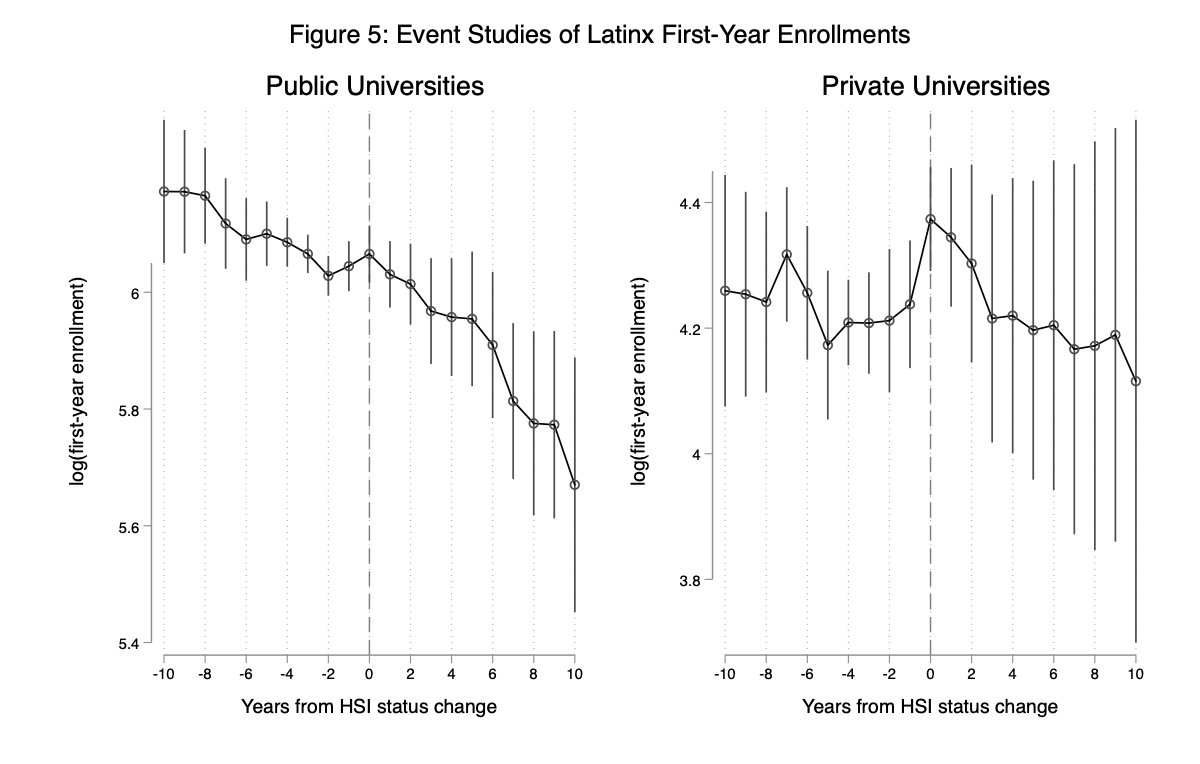

In [22]:
 graph combine c1Latinxpub c2Latinxpri,  /// 
        col(2) xsize(5.5) ysize(3.5) iscale(*1) imargin(medsmall) graphregion(margin(l=5 r=5)) ///
        title("Figure 5: Event Studies of Latinx First-Year Enrollments", position(12) size(medsmall) justification(center))